In [66]:
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
import seaborn as sbn
import scipy.stats as stats
import pandas as pd

In [59]:
anime=pd.read_csv('anime.csv')
anime.head(7)


,Title,Score,Vote,Ranked,Popularity,Episodes,Status,Aired,Premiered,Producers,Licensors,Studios,Source,Duration,Rating
0,Sousou no FrierenFrieren: Beyond Journey's End,9.14,128768,1,508,28,Currently Airing,"Sep 29, 2023 to Mar 2024",Fall 2023,"['Aniplex', 'Dentsu', 'Shogakukan-Shueisha Pro...","None found, add some",Madhouse,Manga,24 min. per ep.,PG-13 - Teens 13 or older
1,Fullmetal Alchemist: Brotherhood,9.09,2080863,2,3,64,Finished Airing,"Apr 5, 2009 to Jul 4, 2010",Spring 2009,"['Aniplex', 'Square Enix', 'Mainichi Broadcast...","Funimation, Aniplex of America",Bones,Manga,24 min. per ep.,R - 17+ (violence & profanity)
2,Steins;Gate,9.07,1375512,3,13,24,Finished Airing,"Apr 6, 2011 to Sep 14, 2011",Spring 2011,"['Frontier Works', 'Media Factory', 'Kadokawa ...",Funimation,White Fox,Visual novel,24 min. per ep.,PG-13 - Teens 13 or older
3,Gintama°Gintama Season 4,9.06,246431,4,337,51,Finished Airing,"Apr 8, 2015 to Mar 30, 2016",Spring 2015,"['TV Tokyo', 'Aniplex', 'Dentsu']","Funimation, Crunchyroll",Bandai Namco Pictures,Manga,24 min. per ep.,PG-13 - Teens 13 or older
4,Shingeki no Kyojin Season 3 Part 2Attack on Ti...,9.05,1545108,5,21,10,Finished Airing,"Apr 29, 2019 to Jul 1, 2019",Spring 2019,"['Production I.G', 'Dentsu', 'Mainichi Broadca...",Funimation,Wit Studio,Manga,23 min. per ep.,R - 17+ (violence & profanity)
5,Gintama: The FinalGintama: The Very Final,9.04,69167,6,1545,1,Finished Airing,"Jan 8, 2021",NaN,"['TV Tokyo', 'Warner Bros. Japan']",Eleven Arts,Bandai Namco Pictures,Manga,1 hr. 44 min.,PG-13 - Teens 13 or older
6,Hunter x Hunter (2011)Hunter x Hunter,9.04,1718520,7,10,148,Finished Airing,"Oct 2, 2011 to Sep 24, 2014",Fall 2011,"['VAP', 'Nippon Television Network', 'Shueisha']",VIZ Media,Madhouse,Manga,23 min. per ep.,PG-13 - Teens 13 or older


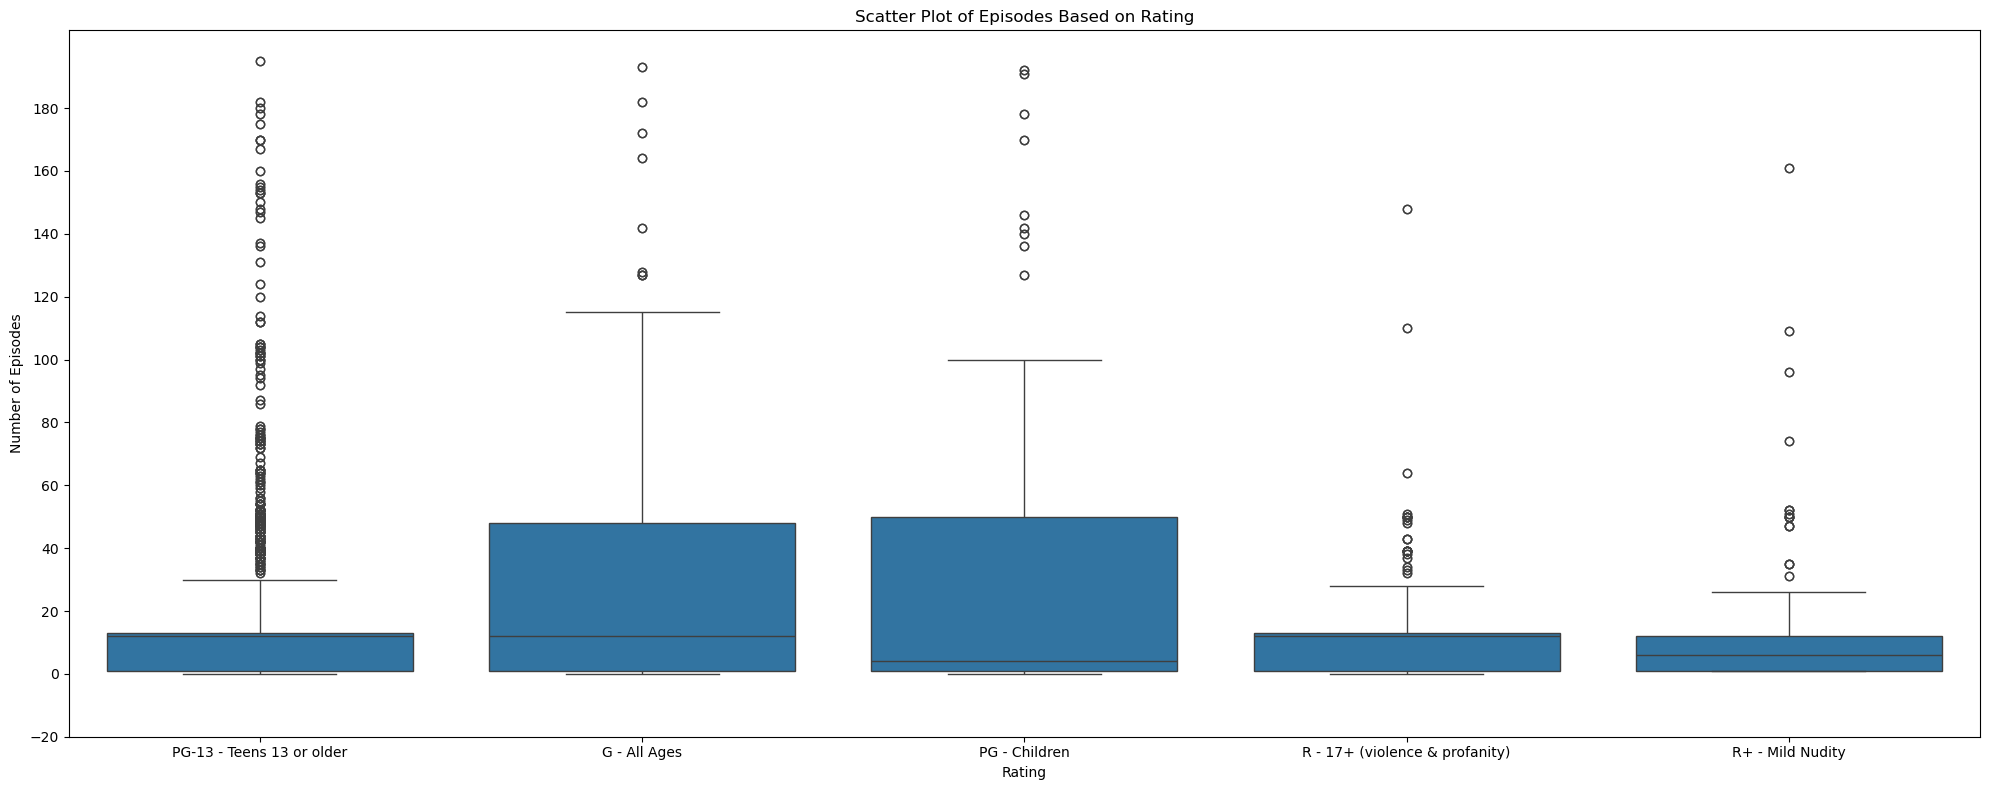

/var/folders/21/cyrfsc590hdgp9t1vt6gpc7h0000gn/T/ipykernel_22041/3066289881.py:40: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anime['Episodes'].fillna(0, inplace=True)


In [54]:
#anime_sorted = anime.sort_values(by='Episodes', ascending=True)
#plt.figure(figsize=(20, 10))
#sbn.scatterplot(data=anime_sorted, x="Rating", y="Episodes")
#plt.yticks(range(0, int(anime_sorted['Episodes'].max()), 10))  # Adjust the 500 value as necessary#
# Convert 'Episodes' column to numeric, coercing errors to NaN (e.g., 'Unknown' becomes NaN)

anime['Episodes'] = pd.to_numeric(anime['Episodes'], errors='coerce')

# Optionally, drop rows where 'Episodes' is NaN (if you don't want to keep these)
anime_cleaned = anime.dropna(subset=['Episodes'])
anime_filtered = anime_cleaned[anime_cleaned['Episodes'] <= 200]

# Or, if you want to replace NaN with a default value (e.g., 0)
# anime['Episodes'].fillna(0, inplace=True)

# Sort the DataFrame by 'Episodes' in ascending order
anime_sorted = anime_cleaned.sort_values(by='Episodes', ascending=True)
anime_sorted = anime_filtered.sort_values(by='Episodes', ascending=True)

# Set the figure size
plt.figure(figsize=(20, 8))

# Create the scatter plot
sbn.boxplot(data=anime_sorted, x="Rating", y="Episodes")

# Set the title and labels
plt.title('Scatter Plot of Episodes Based on Rating')
plt.xlabel('Rating')
plt.ylabel('Number of Episodes')

# Reduce y-axis tick density (show every 500th value or adjust as needed)
plt.yticks(range(-20, 200, 20))  # Adjust 500 as necessary

plt.tight_layout()

# Show the plot
plt.show()
anime['Episodes'] = pd.to_numeric(anime['Episodes'], errors='coerce')
anime_cleaned = anime.dropna(subset=['Episodes'])
anime['Episodes'].fillna(0, inplace=True)
anime_sorted = anime_cleaned.sort_values(by='Episodes', ascending=True)



                            OLS Regression Results                            
Dep. Variable:                  Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.793
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0161
Time:                        11:11:02   Log-Likelihood:                -6055.3
No. Observations:                9910   AIC:                         1.211e+04
Df Residuals:                    9908   BIC:                         1.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4137      0.005   1358.456      0.0

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  Score   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     5.793
Date:                Sun, 24 Nov 2024   Prob (F-statistic):             0.0161
Time:                        11:11:02   Log-Likelihood:                -6055.3
No. Observations:                9910   AIC:                         1.211e+04
Df Residuals:                    9908   BIC:                         1.213e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      7.4137      0.005   1358.456      0.000       7.403       7.424
Episodes       0.0005      0.000      2.407      0.016    9.37e-05       0.001
==============================================================================
Omnibus:                     1129.958   Durbin-Watson:                   0.004
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1550.324
Skew:                           0.935   Prob(JB):                         0.00
Kurtosis:                       3.508   Cond. No.                         31.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

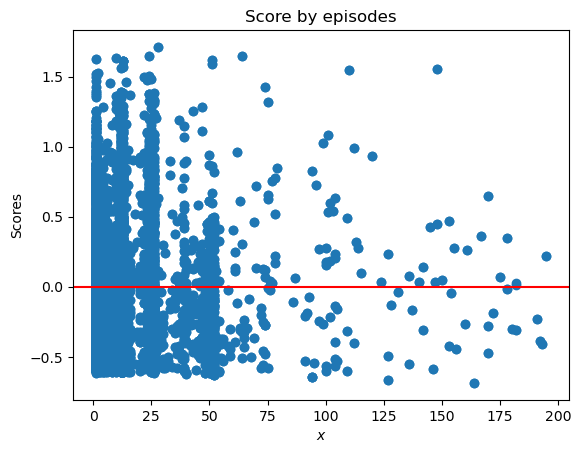

In [84]:
import seaborn as sbn
anime=pd.read_csv("anime.csv")

anime['Episodes'] = pd.to_numeric(anime_no_out['Episodes'], errors='coerce')
anime_no_out = anime[anime['Episodes'] <= 200]
anime_cleaned = anime_no_out.dropna(subset=['Episodes'])
# Optionally, drop rows where 'Episodes' is NaN (if you don't want to keep these)


# Specify the model
anime_form = smf.ols("Score ~ Episodes", data = anime_no_out)

# Fit the model
anime_r = anime_form.fit()

# View parameters
anime_r.params
anime_summary = anime_r.summary()
print(anime_summary)

# Retrieve beta estimates from statsmodels
beta_hat_p = anime_r.params

# Compute estimates
Y_hat_p = beta_hat_p.iloc[0] + anime_no_out.Episodes*beta_hat_p.iloc[1]
print(Y_hat_p)


res_p = anime_no_out.Score - Y_hat_p
plt.scatter(anime_no_out.Episodes, res_p)
plt.axhline(y = 0, color = 'r', linestyle = '-')
plt.xlabel(r'$x$')
plt.ylabel('Scores')
plt.title("Score by episodes");
anime_r.resid.mean()

from scipy.stats import t
anime_r.summary()

Text(0, 0.5, 'Score')

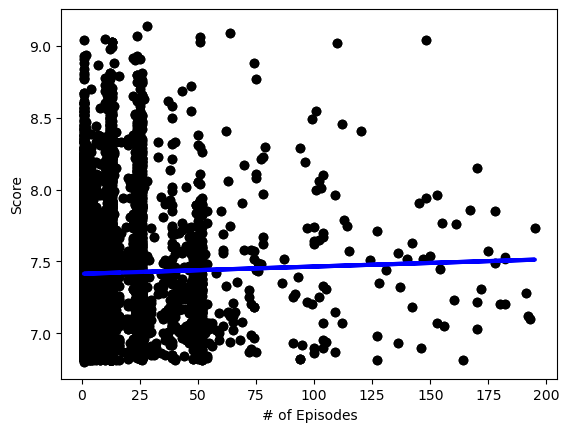

In [86]:
plt.scatter(anime_no_out.Episodes, anime_no_out.Score,  color='black', zorder = 2)
plt.plot(anime_no_out.Episodes, Y_hat_p, color='blue', linewidth = 3, zorder = 3)
plt.xlabel(r'# of Episodes')
plt.ylabel(r'Score')


In [88]:
residuals = anime_r.resid
anime['resid'] = residuals


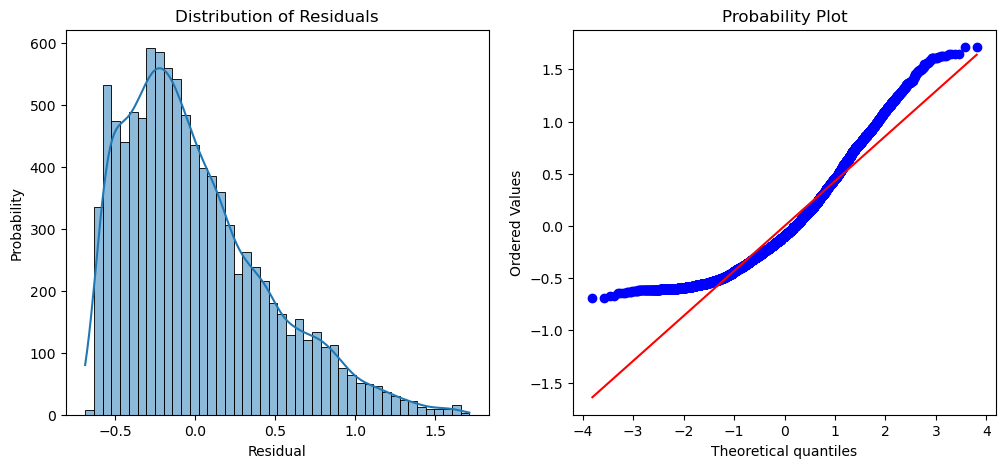

In [89]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sbn.histplot(residuals, kde=True, ax=ax1)
ax1.set_title('Distribution of Residuals')
ax1.set_xlabel('Residual')
ax1.set_ylabel('Probability')
stats.probplot(residuals.to_numpy(), plot=ax2);